In [232]:
import pandas as pd
import folium # pip install folium
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt
import plotly.express as px # pip install plotly

from collections import Counter
# from keplergl import KeplerGl
# 윈도우 한글 폰트 경로
font_path = r"C:\Windows\Fonts\malgun.ttf"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정 (Malgun Gothic)
# plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

# 공용 변수 선언
dataIn = './../dataIn/'
dataOut = './../dataOut/'


In [196]:
# 이미 생성해 놓은 매장 정보 파일을 읽어 옵니다.
starbucks = pd.read_csv(dataOut + 'starbucks_file.csv')
ediya = pd.read_csv(dataOut + 'ediya_file.csv')
hollysBefore = pd.read_csv(dataOut + 'hollys_file.csv')

In [197]:
print(f'스타벅스 매장 갯수 : {len(starbucks)}')
print(f'이디야 매장 갯수 : {len(ediya)}')
print(f'할리스 매장 갯수 : {len(hollysBefore)}')

스타벅스 매장 갯수 : 666
이디야 매장 갯수 : 498
할리스 매장 갯수 : 122


In [198]:
starbucks.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [199]:
ediya.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [200]:
hollysBefore.columns

Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도', '전화 번호', '24시간', 'DT 매장',
       '주차', '테라스', '흡연시설'],
      dtype='object')

In [201]:
print('스타벅스와 할리스의 공통 컬럼 정보')
common_col = starbucks.columns.intersection(hollysBefore.columns)
common_col

스타벅스와 할리스의 공통 컬럼 정보


Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [202]:
print('# 다른 매장들과 공통된 컬럼들만 따로 추출')
hollys = hollysBefore[common_col]
hollys.columns

# 다른 매장들과 공통된 컬럼들만 따로 추출


Index(['브랜드', '상호', '주소', '시도', '군구', '위도', '경도'], dtype='object')

In [203]:
print('# 각 매장의 데이터 프레임을 하나로 모아줍니다')
coffeeFrame = pd.concat([starbucks, ediya, hollys], axis=0)
print(f'전체 매장 갯수 : {len(coffeeFrame)}')

# 각 매장의 데이터 프레임을 하나로 모아줍니다
전체 매장 갯수 : 1286


In [204]:
filename = dataOut + 'coffee_list.csv'
coffeeFrame.to_csv(filename, index=False, encoding='UTF-8')
print(f'{filename} 파일이 저장되었습니다.')

./../dataOut/coffee_list.csv 파일이 저장되었습니다.


In [205]:
coffeeFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1286 entries, 0 to 121
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드     1286 non-null   object 
 1   상호      1286 non-null   object 
 2   주소      1286 non-null   object 
 3   시도      1286 non-null   object 
 4   군구      1286 non-null   object 
 5   위도      1285 non-null   float64
 6   경도      1285 non-null   float64
dtypes: float64(2), object(5)
memory usage: 80.4+ KB


In [206]:
print(f'위도/경도 결측지 제거전 : {len(coffeeFrame)}')

위도/경도 결측지 제거전 : 1286


In [207]:
# notnull() 함수는 결측치가 아니면 True를 반환해주는 함수 ↔ isnull()
mapFrame = coffeeFrame[coffeeFrame['위도'].notnull()]

print(f'위도/경도 결측지 제거후 : {len(mapFrame)}')

위도/경도 결측지 제거후 : 1285


In [208]:
# 지도 위에 매장 표시
# folium에서 사용할 브랜드별 색상 지정
brand_colors = {
    '스타벅스': 'beige',
    '이디야': 'darkpurple',
    '할리스': 'lightblue'
}

seoul_center = [mapFrame['위도'].mean(), mapFrame['경도'].mean()] # 서울 중심 위치
seoul_center

[np.float64(34.21113765830875), np.float64(115.72375779889158)]

In [209]:
# 서울 지도 객체
seoul_map = folium.Map(location=seoul_center, zoom_start=11)

# iterrows() : iterable rows(전체 행을 반복)
# for 색인_번호, 데이터_1행 in mapFrame.iterrows():
# 찾아 볼것 : 마커 크기 조정, popup의 모양
for _, row in mapFrame.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['상호']}({row['브랜드']})", # 팝업 예시 : xxx점(스타벅스)
        icon=folium.Icon(color=brand_colors.get(row['브랜드'], 'gray'))
    ).add_to(seoul_map)
# end for

htmlfile = dataOut + 'coffee_map.html'
seoul_map.save(htmlfile)
print(f'{htmlfile} 파일 생성')

./../dataOut/coffee_map.html 파일 생성


In [210]:
seoul_map

In [211]:
print('# 군구 컬럼이 마포구, 용산구, 서대문구인 항목들만 추출')
concern_gu = ['마포구', '용산구', '서대문구']
myfilter01 = mapFrame[mapFrame['군구'].isin(concern_gu)]
print(f'데이터 갯수 : {len(myfilter01)}')

# 군구 컬럼이 마포구, 용산구, 서대문구인 항목들만 추출
데이터 갯수 : 153


In [212]:
myfilter01.head()

,브랜드,상호,주소,시도,군구,위도,경도
224,스타벅스,리저브 매장 2번,서울특별시 마포구 백범로 35 (신수동),서울특별시,마포구,37.551027,126.943134
225,스타벅스,리저브 매장 2번,서울특별시 마포구 상암산로 76 (상암동),서울특별시,마포구,37.579314,126.892210
226,스타벅스,리저브 매장 2번,서울특별시 마포구 토정로 295 (용강동),서울특별시,마포구,37.541186,126.942209
227,스타벅스,리저브 매장 2번,서울특별시 마포구 양화로 125 (서교동),서울특별시,마포구,37.554636,126.920360
228,스타벅스,리저브 매장 2번,서울특별시 마포구 마포대로 173-14 (아현동),서울특별시,마포구,37.550800,126.953432


In [213]:
my_center = [myfilter01['위도'].mean(), myfilter01['경도'].mean()]

filter_map = folium.Map(location=my_center, zoom_start=13, tiles='OpenStreetMap')

for _, row in myfilter01.iterrows():
    # 브랜드별로 색상을 다르게 지정하려면 brand_colors에 추가하는 방법도 고려해 보세요.
    ic_color = 'white' # 아이콘 색상

    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['주소'],
        tooltip=f"{row['상호']}({row['브랜드']})",
        icon=folium.Icon(
            color=brand_colors.get(row['브랜드'], 'gray'),
            icon_color=ic_color,
            icon='coffee',
            prefix='fa'
        )
    ).add_to(filter_map)
# end for

htmlfile = dataOut + 'coffee_map_02.html'
seoul_map.save(htmlfile)
print(f'{htmlfile} 파일 생성')

./../dataOut/coffee_map_02.html 파일 생성


In [214]:
filter_map

In [215]:
# Plotly로 인터랙티브 지도시각화
# fig = px.scatter_map(
#     mapFrame, lat='', lon='', color='', hover_name='', zoom=11, map_style='open_street_map',
# )
# fig.show()

In [216]:
coffeeFrame.head()

,브랜드,상호,주소,시도,군구,위도,경도
0,스타벅스,리저브 매장 2번,서울특별시 강남구 언주로 425 (역삼동),서울특별시,강남구,37.501087,127.043069
1,스타벅스,리저브 매장 2번,서울특별시 강남구 강남대로 538 (논현동),서울특별시,강남구,37.510178,127.022223
2,스타벅스,리저브 매장 2번,서울특별시 강남구 강남대로 584 (논현동),서울특별시,강남구,37.513931,127.020606
3,스타벅스,리저브 매장 2번,서울특별시 강남구 테헤란로 125 (역삼동),서울특별시,강남구,37.499517,127.031495
4,스타벅스,리저브 매장 2번,서울특별시 강남구 남부순환로 2947 (대치동),서울특별시,강남구,37.494668,127.062583


In [217]:
# 차트 그리기 시작
mycolor = ['green', 'blue', 'red']

In [218]:
# value_counts() 함수는 빈도
chart_data = coffeeFrame['브랜드'].value_counts()
chart_data

브랜드
스타벅스    666
이디야     498
할리스     122
Name: count, dtype: int64

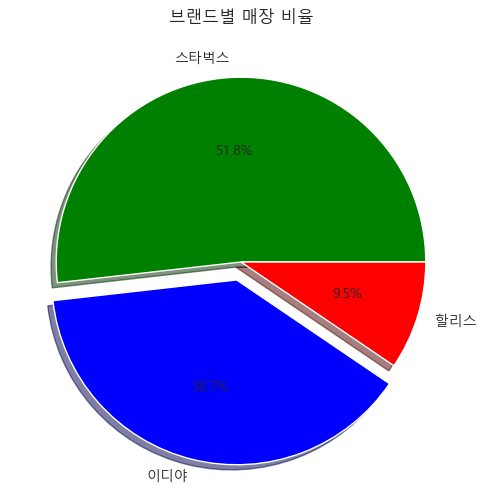

In [219]:
plt.figure(figsize=(6, 6))  #도화지 준비

plt.title('브랜드별 매장 비율')
chart_data.plot(
    kind='pie',
    autopct='%.1f%%',
    colors=mycolor,
    shadow=True,
    explode=(0, 0.1, 0)
)
plt.ylabel('')
plt.savefig(dataOut + 'coffee_01.png')

In [220]:
brand_counts = Counter(coffeeFrame['브랜드'])
brand_counts

Counter({'스타벅스': 666, '이디야': 498, '할리스': 122})

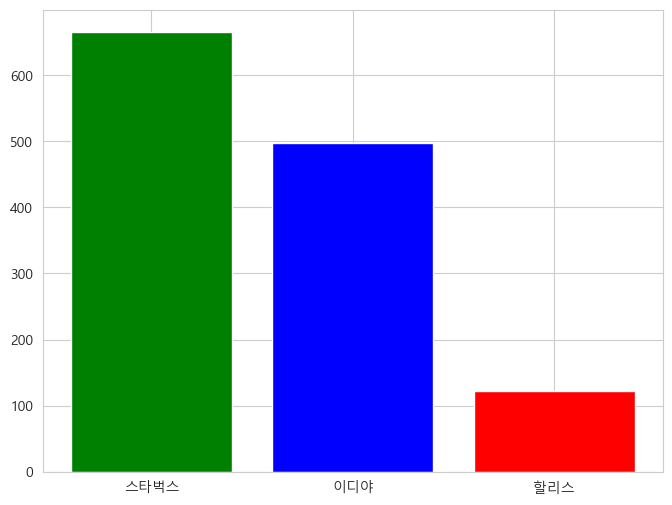

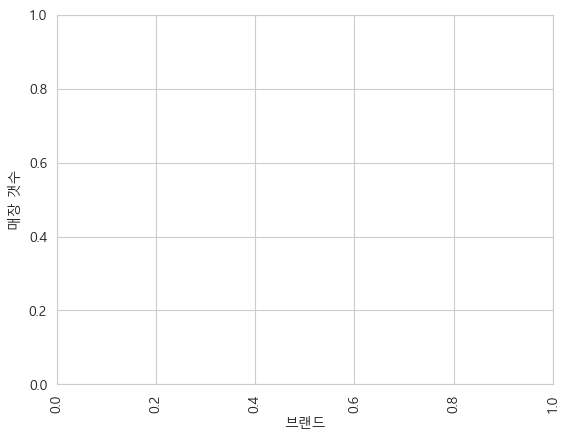

In [221]:
plt.figure(figsize=(8, 6))
plt.bar(brand_counts.keys(), brand_counts.values(), color=mycolor)

plt.figure('브랜드별 매장 갯수')
plt.xlabel('브랜드')
plt.ylabel('매장 갯수')
plt.xticks(rotation=90)
plt.savefig(dataOut + 'coffee_02.png')

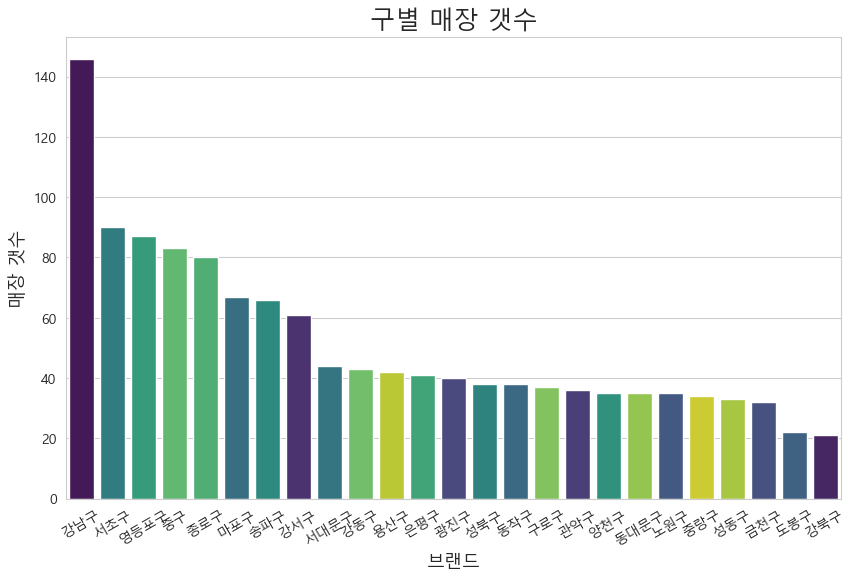

In [222]:
plt.figure(figsize=(10, 6))
#myorder = sorted(coffeeFrame['군구'].value_counts().index)
myorder = coffeeFrame['군구'].value_counts().index
# myorder

# countplot 함수 : 범주형 데이터의 빈도를 막대 그래프로 보여줍니다.
sns.countplot(data=coffeeFrame, x='군구', order=myorder,hue='군구', palette='viridis')

plt.title('구별 매장 갯수', size=18)
plt.xlabel('브랜드', size=13)
plt.ylabel('매장 갯수',size=13)
plt.xticks(rotation=30)
plt.savefig(dataOut + 'coffee_03.png')

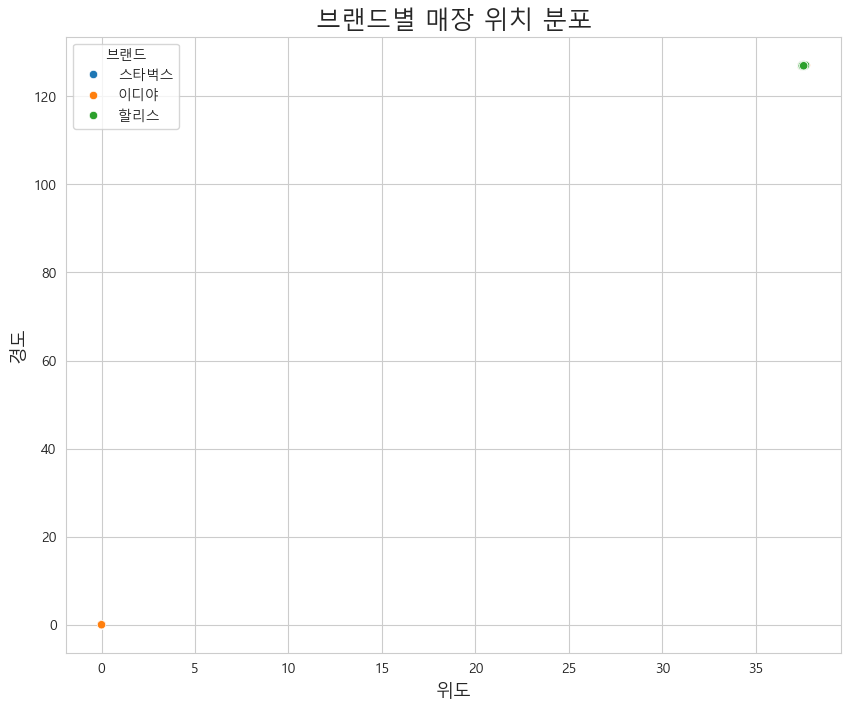

In [223]:
plt.figure(figsize=(10, 8))

# scatterplot 함수는 두 개의 연속형 데이터 사이의 관계를 점으로 그려주는 그래프
sns.scatterplot(data = mapFrame, x='위도', y='경도', hue='브랜드')

plt.title('브랜드별 매장 위치 분포', size=18)
plt.xlabel('위도', size=13)
plt.ylabel('경도', size=13)
plt.savefig(dataOut + 'coffee_04.png')

In [224]:
# 구별, 브랜드별 점유율
gu_brand_data = coffeeFrame.groupby(['군구', '브랜드'])
gu_brand_data

In [231]:
# 중첩된 색인을 단일 색인으로 변경하고, 누락이 된 데이터는 0으로 채워주세요.
# unstack() 함수는 중첩된 색인을, 2차원 형식의 표(pivot) 형태로 변형시켜 줍니다.
gu_brand_chart = gu_brand_data.size().unstack(fill_value=0)
gu_brand_chart

브랜드,스타벅스,이디야,할리스
군구,,,
강남구,98,33,15
강동구,20,19,4
강북구,7,12,2
강서구,32,26,3
관악구,14,18,4
광진구,23,13,4
구로구,13,18,6
금천구,15,14,3
노원구,15,16,4


<Figure size 1200x800 with 0 Axes>

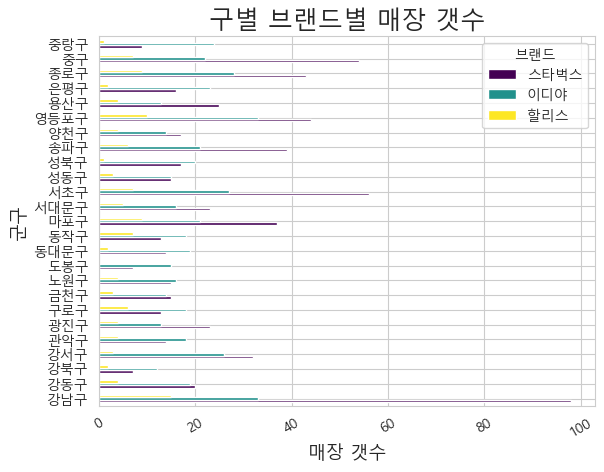

In [233]:
plt.figure(figsize=(12, 8))
gu_brand_chart.plot(kind='barh', colormap='viridis')

plt.title('구별 브랜드별 매장 갯수', size=18)
plt.ylabel('군구', size=13)
plt.xlabel('매장 갯수', size=13)
plt.xticks(rotation=30)
plt.legend(title='브랜드')
plt.savefig(dataOut + 'coffee_05.png')

<Figure size 1200x800 with 0 Axes>

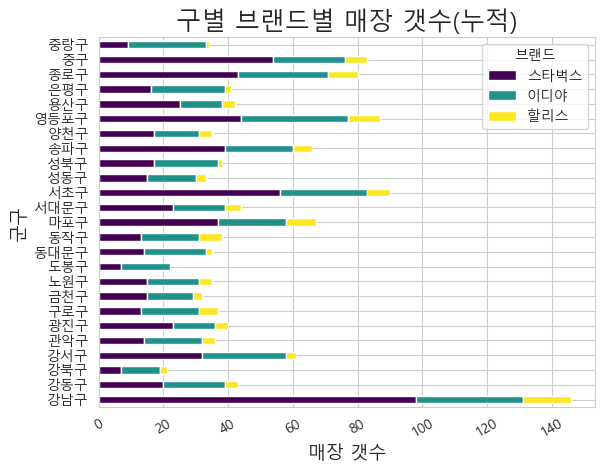

In [234]:
plt.figure(figsize=(12, 8))
gu_brand_chart.plot(kind='barh', colormap='viridis', stacked=True)

plt.title('구별 브랜드별 매장 갯수(누적)', size=18)
plt.ylabel('군구', size=13)
plt.xlabel('매장 갯수', size=13)
plt.xticks(rotation=30)
plt.legend(title='브랜드')
plt.savefig(dataOut + 'coffee_06.png')

In [235]:
# 할리스 편의 서비스 정보
# 1.편의 서비스를 하나도 제공하지 않는 매장 정보
# 2. 2개 이상의 서비스를 제공하는 매장 정보
# 3. 2개 이상의 서비스를 제공하는 곳중에서 가장 많은 구 정보

In [245]:
# 편의 서비스 관련 컬럼 리스트
service_columns = ['상호', '24시간', 'DT 매장', '주차', '테라스', '흡연시설']
hollysBefore[service_columns].head()

,상호,24시간,DT 매장,주차,테라스,흡연시설
0,충무로역점,no,no,yes,no,no
1,FKI타워2호점,no,no,no,no,no
2,신대방삼거리역점,no,no,no,no,no
3,여의도포스트타워점,no,no,yes,no,no
4,대림역점,no,no,no,yes,no


In [246]:
# 파생 컬럼 추가 : '서비스 제공 개수'에는 'yes' 개수를 카운터하여 저장합니다.
hollysBefore['서비스 제공 개수'] = hollysBefore[service_columns].apply(lambda row:sum(row=='yes'), axis=1)
hollysBefore.head()

,브랜드,상호,주소,시도,군구,위도,경도,전화 번호,24시간,DT 매장,주차,테라스,흡연시설,서비스 제공 개수
0,할리스,충무로역점,"서울특별시 중구 퇴계로36길 2 (필동2가, 동국대학교충무로영상센터)",서울특별시,중구,37.560644,126.993567,02-2268-8960,no,no,yes,no,no,1
1,할리스,FKI타워2호점,"서울특별시 영등포구 여의대로 24 (여의도동, 에프케이아이타워) 1층",서울특별시,영등포구,37.522180,126.919917,02-782-3647,no,no,no,no,no,0
2,할리스,신대방삼거리역점,서울특별시 동작구 상도로 60 (대방동) 1층~2층,서울특별시,동작구,37.499561,126.927153,02-823-2377,no,no,no,no,no,0
3,할리스,여의도포스트타워점,서울특별시 영등포구 여의나루로 60 포스트타워 여의도 1층,서울특별시,영등포구,37.522300,126.926225,02-2135-5321,no,no,yes,no,no,1
4,할리스,대림역점,서울특별시 영등포구 도림로 140 대림빌딩 101호,서울특별시,영등포구,37.493024,126.897628,02-834-1000,no,no,no,yes,no,1


In [253]:
print('# 편의 서비스 제공을 하나도 제공하지 하지않는 매장')
no_service_stores = hollysBefore[hollysBefore['서비스 제공 개수'] == 0]
# no_service_stores[service_columns].head(30)

filename = dataOut + 'hollys_no_service_stores.csv'
no_service_stores.to_csv(filename, index=False, encoding='utf-8')
print(f'{filename} 파일이 저장되었습니다.')

# 편의 서비스 제공을 하나도 제공하지 하지않는 매장
./../dataOut/hollys_no_service_stores.csv 파일이 저장되었습니다.


In [254]:
print('# 2개 이상의 편의 서비스 제공을 하는 매장')
multiple_service_stores = hollysBefore[hollysBefore['서비스 제공 개수'] >= 2]

filename = dataOut + 'hollys_multiple_service_stores.csv'
multiple_service_stores.to_csv(filename, index=False, encoding='utf-8')
print(f'매장 갯수 : {len(multiple_service_stores)}개')
print(f'{filename} 파일이 저장되었습니다.')

# 2개 이상의 편의 서비스 제공을 하는 매장
매장 갯수 : 22개
./../dataOut/hollys_multiple_service_stores.csv 파일이 저장되었습니다.


In [262]:
# '군구'별 '서비스 제공 개수'의 그룹핑 객체
condition = multiple_service_stores.groupby('군구')['서비스 제공 개수']
type(condition)

pandas.core.groupby.generic.SeriesGroupBy

In [264]:
# idmax() 함수는 값이 가장 큰 항목의 색인정보를 반환합니다. 반대 합수는 idxmin()
print(f'구별 서비스 제공 갯수의 총합이 가장 큰 구 : {condition.sum().idxmax()}')

구별 서비스 제공 갯수의 총합이 가장 큰 구 : 동작구


In [265]:
top05 = condition.sum().sort_values(ascending=False).head(n=5) # n= 안적고 숫자만 적어도 됨
top05 # 필요하다면 그래프 그리기

군구
동작구    8
강동구    4
강남구    4
중구     4
구로구    4
Name: 서비스 제공 개수, dtype: int64

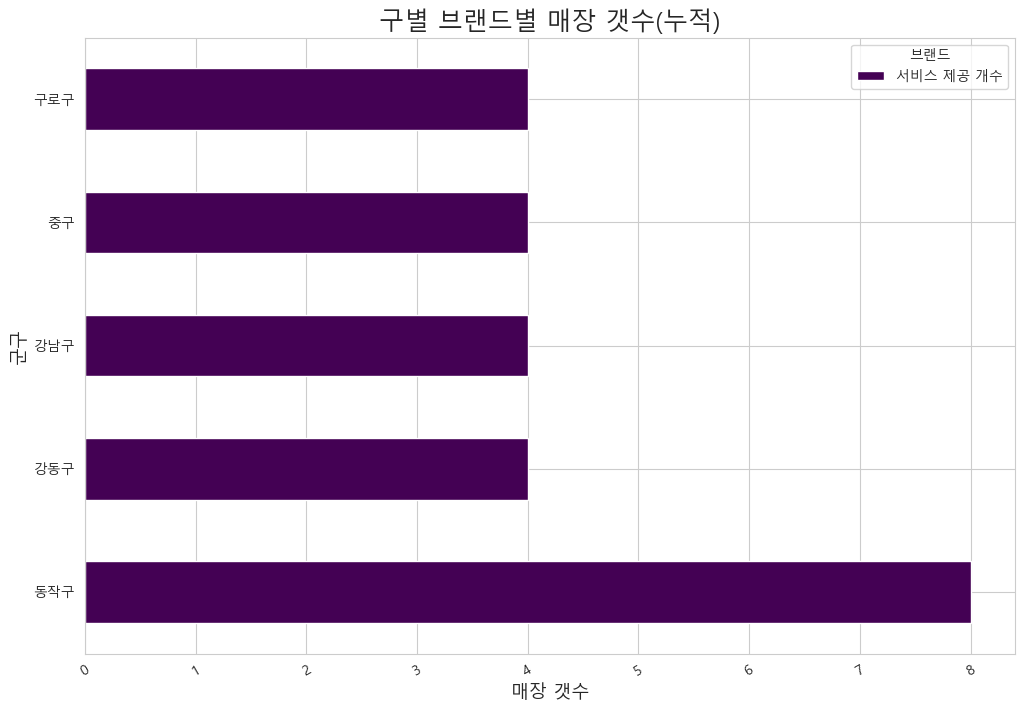

In [267]:
plt.figure(figsize=(12, 8))
top05.plot(kind='barh', colormap='viridis', stacked=True)

plt.title('구별 브랜드별 매장 갯수(누적)', size=18)
plt.ylabel('군구', size=13)
plt.xlabel('매장 갯수', size=13)
plt.xticks(rotation=30)
plt.legend(title='브랜드')
plt.savefig(dataOut + 'coffee_07.png')

In [272]:
# mode() 함수는 최빈도를 구해 주는 함수입니다.
most_common_gu = multiple_service_stores['군구'].mode()[0]
print(f'2개 이상의 서비스 제공의 총합이 가장 많은 구 : {most_common_gu}')

2개 이상의 서비스 제공의 총합이 가장 많은 구 : 동작구


In [273]:
# 가장 많은 구의 매장 정보 확인
most_common_gu_stores = multiple_service_stores[multiple_service_stores['군구']==most_common_gu]
most_common_gu_stores

,브랜드,상호,주소,시도,군구,위도,경도,전화 번호,24시간,DT 매장,주차,테라스,흡연시설,서비스 제공 개수
47,할리스,중앙대점,서울특별시 동작구 흑석로 77 (흑석동) 1~4층,서울특별시,동작구,37.506983,126.958246,02-3280-3280,no,no,no,yes,yes,2
58,할리스,대방역점,"서울특별시 동작구 알마타길 6 (대방동, 파밀리에 하늘마루) 101호, 102호",서울특별시,동작구,37.509857,126.924954,02-825-6369,no,no,yes,yes,no,2
93,할리스,노량진역점,서울특별시 동작구 노량진로 157 2-5층,서울특별시,동작구,37.513979,126.943356,02-827-0280,yes,no,no,no,yes,2
100,할리스,이수역점,"서울특별시 동작구 동작대로 83 (사당동, 헤라피스빌딩) B1~1층",서울특별시,동작구,37.484012,126.981551,02-588-4845,no,no,yes,no,yes,2


In [274]:
most_common_gu_center = [most_common_gu_stores['위도'].mean(), most_common_gu_stores['경도'].mean()]

most_common_gu_map = folium.Map(location=most_common_gu_center, zoom_start=13, tiles='OpenStreetMap')

for _, row in most_common_gu_stores.iterrows():
    # 브랜드별로 색상을 다르게 지정하려면 brand_colors에 추가하는 방법도 고려해 보세요.
    ic_color = 'white' # 아이콘 색상

    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['주소'],
        tooltip=f"{row['상호']}({row['브랜드']})",
        icon=folium.Icon(
            color='blue',
            icon_color=ic_color,
            icon='info-sign',
            prefix='glyphicon'
        )
    ).add_to(most_common_gu_map)
# end for

htmlfile = dataOut + 'coffee_map_03.html'
most_common_gu_map.save(htmlfile)
print(f'{htmlfile} 파일 생성')

./../dataOut/coffee_map_03.html 파일 생성


In [275]:
most_common_gu_map